In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_excel("University_Clustering.xlsx")
df

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90
5,Dartmouth,NH,1340,89,23,10,32162,95
6,Duke,NC,1315,90,30,12,31585,95
7,Georgetown,DC,1255,74,24,12,20126,92
8,Harvard,MA,1400,91,14,11,39525,97
9,JohnsHopkins,MD,1305,75,44,7,58691,87


In [ ]:
df.shape

(25, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [ ]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [ ]:
df.drop("State",axis=1,inplace=True)
df_new=df.drop("Univ",axis=1)
df_new

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [ ]:
from sklearn.preprocessing import StandardScaler
for col in df_new:
  ss=StandardScaler()
  df_new[col]=ss.fit_transform(df_new[[col]])

In [ ]:
df_new.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


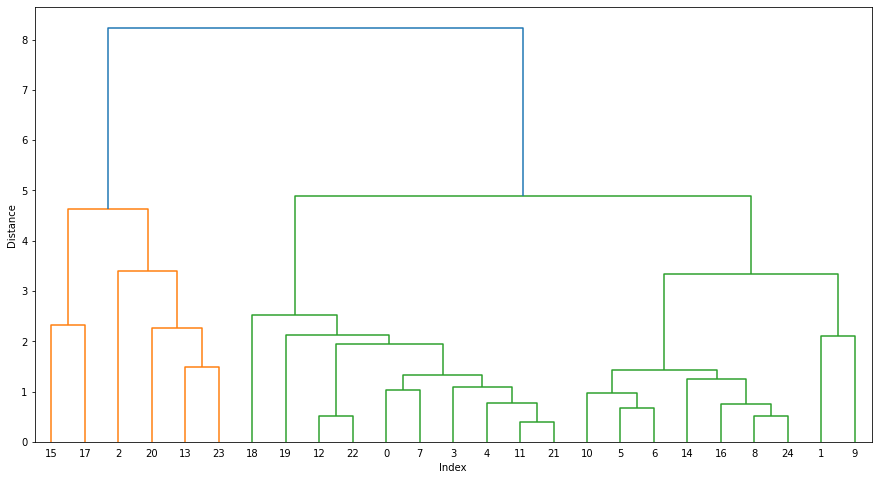

In [ ]:
z=linkage(df_new,method="complete",metric="euclidean") # the z object contains distance between each datapoints with others.
plt.figure(figsize=(15,8))
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(
    z,
    leaf_rotation=0, # rotates the x-axis labels
    leaf_font_size=10 # font size for the x-axis labels
)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean')
model.fit(df_new)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [ ]:
model.labels_

array([2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2,
       2, 0, 1])

In [ ]:
df["labels"]=model.labels_

In [ ]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [ ]:
df.groupby("labels").mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
labels,,,,,,
0,1114.333333,47.000000,67.833333,17.000000,13384.666667,74.000000
1,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
2,1271.000000,81.500000,35.400000,12.900000,23380.000000,89.400000


In [ ]:
df[df["labels"]==0]["Univ"]

2            CMU
13     PennState
15        Purdue
17      TexasA&M
20     UMichigan
23    UWisconsin
Name: Univ, dtype: object

In [ ]:
df[df["labels"]==1]["Univ"]

1          CalTech
5        Dartmouth
6             Duke
8          Harvard
9     JohnsHopkins
10             MIT
14       Princeton
16        Stanford
24            Yale
Name: Univ, dtype: object

In [ ]:
df[df["labels"]==2]["Univ"]

0            Brown
3         Columbia
4          Cornell
7       Georgetown
11    Northwestern
12       NotreDame
18      UCBerkeley
19        UChicago
21           UPenn
22             UVA
Name: Univ, dtype: object

In [ ]:
df=pd.read_csv("wine-clustering.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
for col in df:
  ss=StandardScaler()
  df[col]=ss.fit_transform(df[[col]])

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


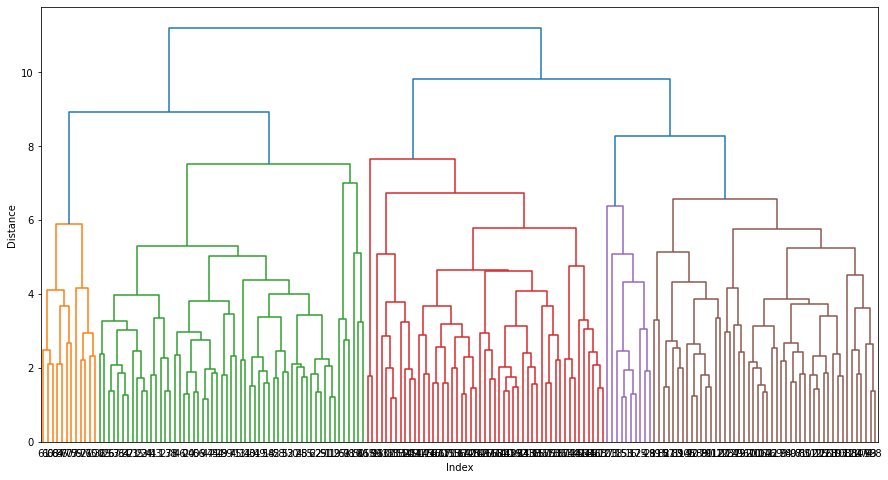

In [ ]:
z=linkage(df,method="complete",metric="euclidean") # the z object contains distance between each datapoints with others.
plt.figure(figsize=(15,8))
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(
    z,
    leaf_rotation=0, # rotates the x-axis labels
    leaf_font_size=10 # font size for the x-axis labels
)
plt.show()

Now from this dendogram, how many clusters we can make, the point is if no. of datapoints is huge, then this dendogram becomes very confusing. So, when u have huge no. of data go for K-Means.